# Industrial Copper Modeling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('Copper_Set.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB
None


In [54]:
df1=df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [55]:
col_name={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'}
df1.rename(columns=col_name, inplace=True)


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity_tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item_type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   81028 non-null   object 
 11  product_ref    181673 non-null  int64  
 12  delivery_date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [57]:
df1.shape

(181673, 14)

In [58]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}") 


id - 181672
item_date - 253
quantity_tons - 181673
customer - 1170
country - 18
status - 10
item_type - 7
application - 31
thickness - 595
width - 1386
material_ref - 11496
product_ref - 33
delivery_date - 29
selling_price - 9796


In [59]:
df1.isnull().sum()

id                    2
item_date             1
quantity_tons         0
customer              1
country              28
status                2
item_type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery_date         1
selling_price         1
dtype: int64

In [60]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery_date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [61]:
df1.material_ref.value_counts()

material_ref
DX51D+Z                          922
G9010                            856
DC01 RED.FLAT KUCHNIA EKO 2.2    777
DC01                             725
G9006                            671
                                ... 
R501-060 ATL                       1
FZPA002067                         1
FZPA004301                         1
N01-0008526                        1
202006170005.IO.1.1                1
Name: count, Length: 11495, dtype: int64

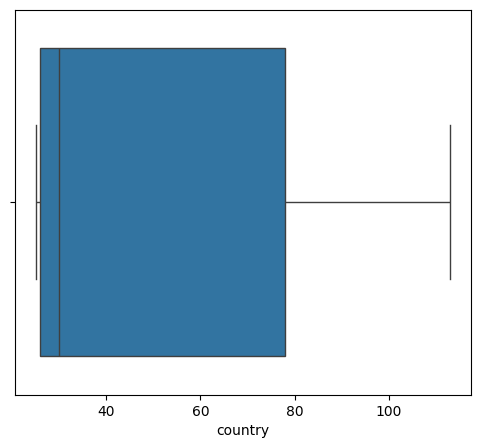

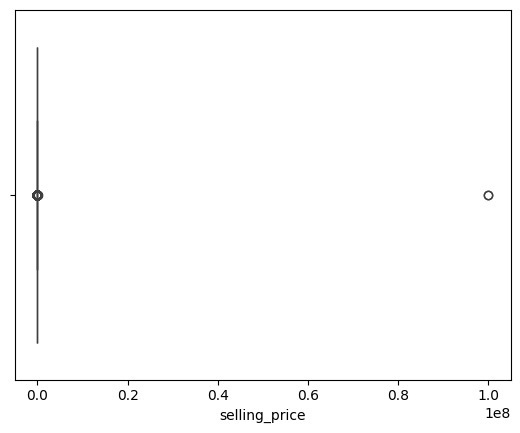

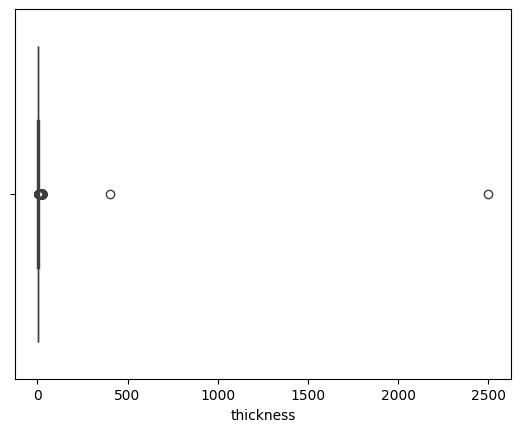

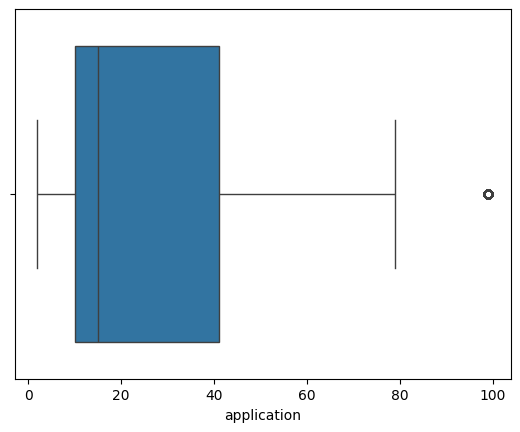

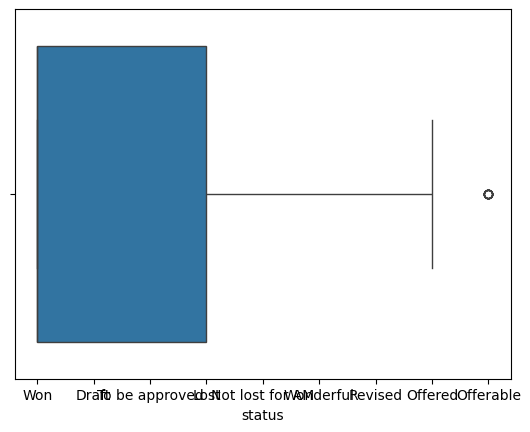

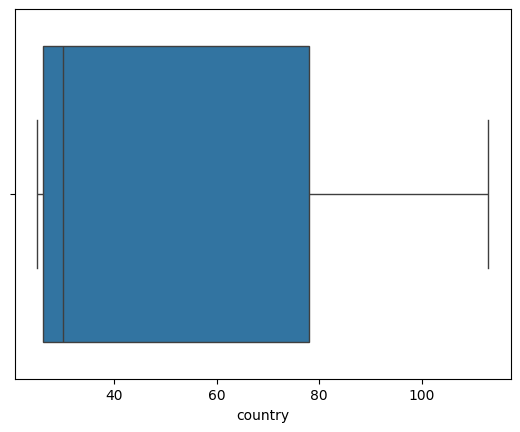

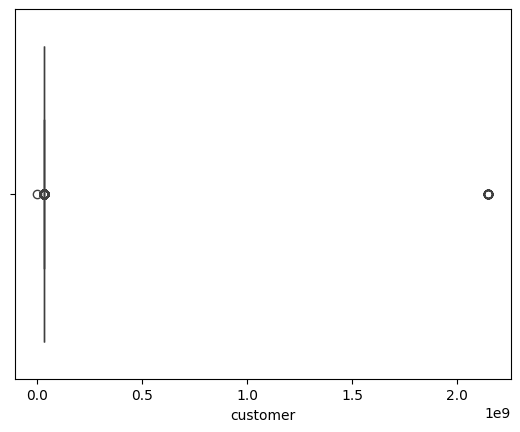

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df1,x='country')
plt.show()
sns.boxplot(data=df1,x='selling_price')
plt.show()
sns.boxplot(data=df1,x='thickness')
plt.show()
sns.boxplot(data=df1,x='application')
plt.show()
sns.boxplot(data=df1,x='status')
plt.show()
sns.boxplot(data=df1,x='country')
plt.show()
sns.boxplot(data=df1,x='customer')
plt.show()

In [63]:
# df1.item_date = df1.item_date.ffill()
# df1.delivery_date = df1.delivery_date.bfill()
df1.id=df1.id.fillna('NA')
df1.status = df1.status.fillna(df1.status.mode()[0])
df1.customer=df1.customer.fillna(df1.customer.median())
df1.country=df1.country.fillna(df1.country.median())
df1.application=df1.application.fillna(df1.application.median())
df1.thickness=df1.thickness.fillna(df1.thickness.median())
df['material_ref'] = np.where(df['material_ref'].astype(str).str.startswith('00000'), np.nan, df['material_ref'])


In [64]:
print(df1.isnull().sum())
print(df1.shape)

id                    0
item_date             1
quantity_tons         0
customer              0
country               0
status                0
item_type             0
application           0
thickness             0
width                 0
material_ref     100645
product_ref           0
delivery_date         1
selling_price         1
dtype: int64
(181673, 14)


In [65]:
type_dict = {'id': 'str', 'quantity_tons': 'float32','customer':'int64','country':'int8','status':'category','item_type':'category','application':'int8',
            'thickness':'float32','width':'int32','product_ref':'int64','selling_price':'float64'}


In [66]:
df1.quantity_tons = df1.quantity_tons.replace('e', 0)


C:\Users\sansu\AppData\Local\Temp\ipykernel_18460\955684390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.quantity_tons = df1.quantity_tons.replace('e', 0)


In [67]:
num=df1.select_dtypes(include=['int','float']).columns
for col in num:
    print(f"{col} -  {(df1[col] <= 0).sum()}")


item_date -  0
quantity_tons -  5
customer -  0
country -  0
application -  0
thickness -  0
width -  0
product_ref -  0
delivery_date -  0
selling_price -  7


In [68]:
col_to_mask=['quantity_tons', 'selling_price']
df1[col_to_mask] =df1[col_to_mask] .mask(df1[col_to_mask] <= 0, np.nan)


In [69]:

df1 = df1.astype(type_dict)

df1.item_date = pd.to_datetime(df1.item_date,format='%Y%m%d', errors='coerce').dt.date
df1.delivery_date = pd.to_datetime(df1.delivery_date,format='%Y%m%d', errors='coerce').dt.date
df1.item_date = df1.item_date.ffill()
df1.delivery_date = df1.delivery_date.bfill()
df1.item_date=df1.item_date.astype('datetime64[s]')
df1.delivery_date=df1.delivery_date.astype('datetime64[ns]')
df1.selling_price=df1.selling_price.fillna(df1.selling_price.median())
df1.quantity_tons=df1.quantity_tons.fillna(df1.quantity_tons.median())
df1 = df1.drop(columns=['material_ref'])

In [70]:
print(df1.isnull().sum())
df1.info()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[s] 
 2   quantity_tons  181673 non-null  float32       
 3   customer       181673 non-null  int64         
 4   country        181673 non-null  int8          
 5   status         181673 non-null  category      
 6   item_type      181673 non-null  category      
 7   application    181673 non-null  int8          
 8   thickness      181673 non-null  float32       
 9   width          181673 non-null  int32         
 10  

In [71]:
df1.describe().T


,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:44:33.431935232,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


In [72]:

print(df1.isnull().sum())
print(df1.shape)

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64
(181673, 13)


In [73]:
df1.describe().T


,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:44:33.431935232,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


In [74]:
print(df1.duplicated().sum())
print(df1.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[s] 
 2   quantity_tons  181673 non-null  float32       
 3   customer       181673 non-null  int64         
 4   country        181673 non-null  int8          
 5   status         181673 non-null  category      
 6   item_type      181673 non-null  category      
 7   application    181673 non-null  int8          
 8   thickness      181673 non-null  float32       
 9   width          181673 non-null  int32         
 10  product_ref    181673 non-null  int64         
 11  delivery_date  181673 non-null  datetime64[ns]
 12  selling_price  181673 non-null  float64       
dtypes: category(2), datetime64[ns](1), datetime64[s](1), float32(2), float64(1), int32(1), int64(2), int8(

In [75]:
df1.status.unique()

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful']

In [76]:
df1.status.value_counts()

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64